In [3]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
start = datetime.datetime(2017,7,11)
end = datetime.datetime(2022,7,11)

In [17]:
google = web.DataReader("GOOGL",'yahoo',start,end)
microsoft = web.DataReader("MSFT",'yahoo',start,end)

In [73]:
google.to_csv('google.csv')
microsoft.to_csv('microsoft.csv')

In [28]:
google.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-07-10,953.130005,941.950012,941.950012,951.000000,1451500,951.000000
2017-07-11,954.890015,945.119995,950.520020,953.530029,1461200,953.530029
2017-07-12,969.630005,957.039978,960.859985,967.659973,1602100,967.659973
2017-07-13,978.700012,964.799988,970.799988,968.849976,1524600,968.849976
2017-07-14,977.539978,970.150024,974.000000,976.909973,1079600,976.909973


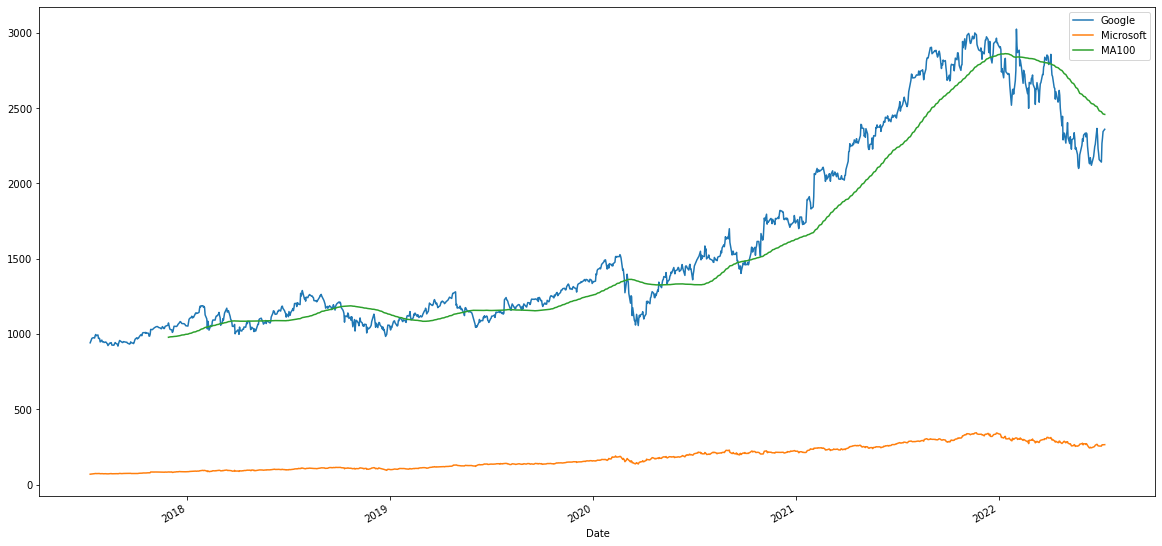

In [40]:
google['Open'].plot(label='Google',figsize=(20,10))
microsoft['Open'].plot(label='Microsoft')
google['MA100']=google['Open'].rolling(100).mean()
google['MA100'].plot(label='MA100')
plt.legend()

Text(0, 0.5, 'Volume Traded')

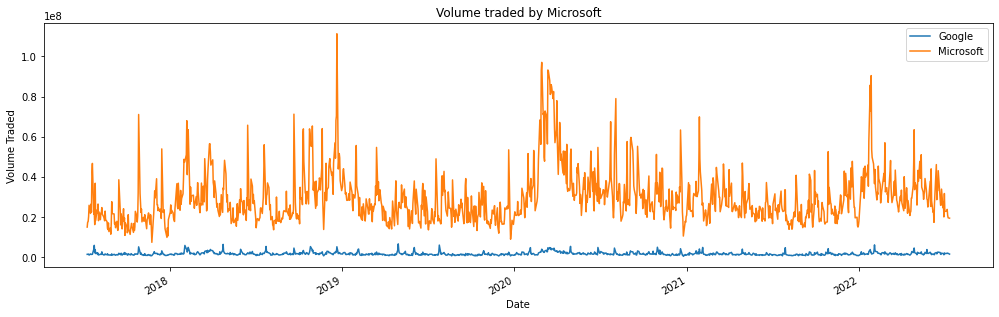

In [22]:
google['Volume'].plot(label='Google',figsize=(17,5))
plt.title('Volume traded by Google')
microsoft['Volume'].plot(label='Microsoft')
plt.title('Volume traded by Microsoft')
plt.legend()
plt.ylabel('Volume Traded')

In [12]:
google.iloc[[google['Volume'].argmax()]]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-30,1200.97998,1183.0,1190.630005,1198.959961,6658900,1198.959961


<AxesSubplot:xlabel='Date'>

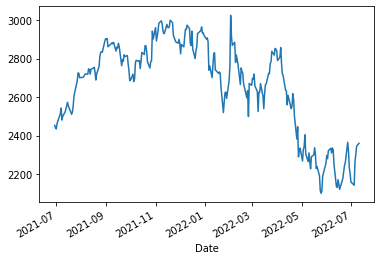

In [13]:
google.iloc[1000:1520]['Open'].plot()

In [31]:
google['Total Traded']=google['Open']*google['Volume']
microsoft['Total Traded']=microsoft['Open']*microsoft['Volume']

In [15]:
google.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2017-07-10,953.130005,941.950012,941.950012,951.000000,1451500,951.000000,1.367240e+09
2017-07-11,954.890015,945.119995,950.520020,953.530029,1461200,953.530029,1.388900e+09
2017-07-12,969.630005,957.039978,960.859985,967.659973,1602100,967.659973,1.539394e+09
2017-07-13,978.700012,964.799988,970.799988,968.849976,1524600,968.849976,1.480082e+09
2017-07-14,977.539978,970.150024,974.000000,976.909973,1079600,976.909973,1.051530e+09


Text(0, 0.5, 'Total Traded')

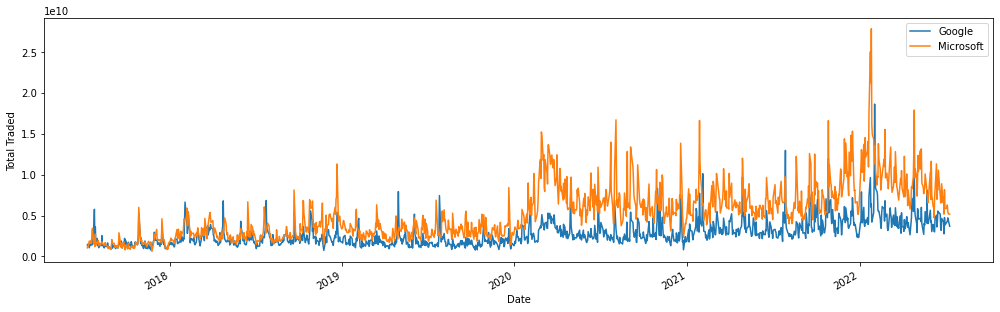

In [33]:
google['Total Traded'].plot(label='Google',figsize=(17,5))
microsoft['Total Traded'].plot(label='Microsoft')
plt.legend()
plt.ylabel('Total Traded')

In [34]:
google['Total Traded'].argmax()

1151

In [35]:
google.iloc[[google['Total Traded'].argmax()]]

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2022-02-02,3030.929932,2910.449951,3025.0,2960.0,6160000,2960.0,1.863400e+10


In [43]:
from pandas.plotting import scatter_matrix
import pandas as pd

In [46]:
car_comp=pd.concat([google['Open'],microsoft['Open']],axis=1)
car_comp.columns=['Google Open', 'Microsoft Open']

array([[<AxesSubplot:xlabel='Google Open', ylabel='Google Open'>,
        <AxesSubplot:xlabel='Microsoft Open', ylabel='Google Open'>],
       [<AxesSubplot:xlabel='Google Open', ylabel='Microsoft Open'>,
        <AxesSubplot:xlabel='Microsoft Open', ylabel='Microsoft Open'>]],
      dtype=object)

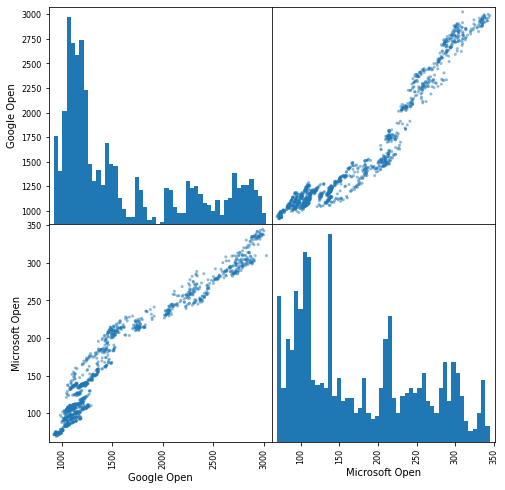

In [47]:
scatter_matrix(car_comp,figsize=(8,8),hist_kwds={'bins':50})

In [52]:
google['returns'] = (google['Close']/google['Close'].shift(1)) -1

In [53]:
google.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA100,returns
Date,,,,,,,,,
2017-07-10,953.130005,941.950012,941.950012,951.000000,1451500,951.000000,1.367240e+09,NaN,NaN
2017-07-11,954.890015,945.119995,950.520020,953.530029,1461200,953.530029,1.388900e+09,NaN,0.002660
2017-07-12,969.630005,957.039978,960.859985,967.659973,1602100,967.659973,1.539394e+09,NaN,0.014819
2017-07-13,978.700012,964.799988,970.799988,968.849976,1524600,968.849976,1.480082e+09,NaN,0.001230
2017-07-14,977.539978,970.150024,974.000000,976.909973,1079600,976.909973,1.051530e+09,NaN,0.008319


In [54]:
microsoft['returns'] = (microsoft['Close']/microsoft['Close'].shift(1)) -1

In [55]:
microsoft.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2017-07-10,70.250000,69.199997,69.459999,69.980003,15014500.0,65.547043,1.042907e+09,NaN
2017-07-11,70.680000,69.750000,70.000000,69.989998,17460000.0,65.556396,1.222200e+09,0.000143
2017-07-12,71.279999,70.550003,70.690002,71.150002,17750900.0,66.642937,1.254811e+09,0.016574
2017-07-13,72.040001,71.309998,71.500000,71.769997,20269800.0,67.223640,1.449291e+09,0.008714
2017-07-14,73.269997,71.959999,72.239998,72.779999,25868100.0,68.169662,1.868711e+09,0.014073


<AxesSubplot:>

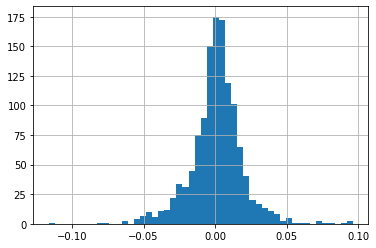

In [56]:
google['returns'].hist(bins=50)

<AxesSubplot:>

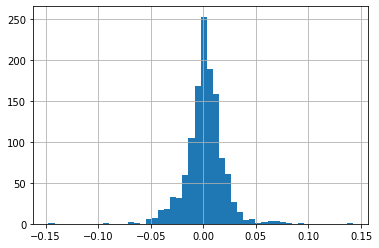

In [58]:
microsoft['returns'].hist(bins=50)

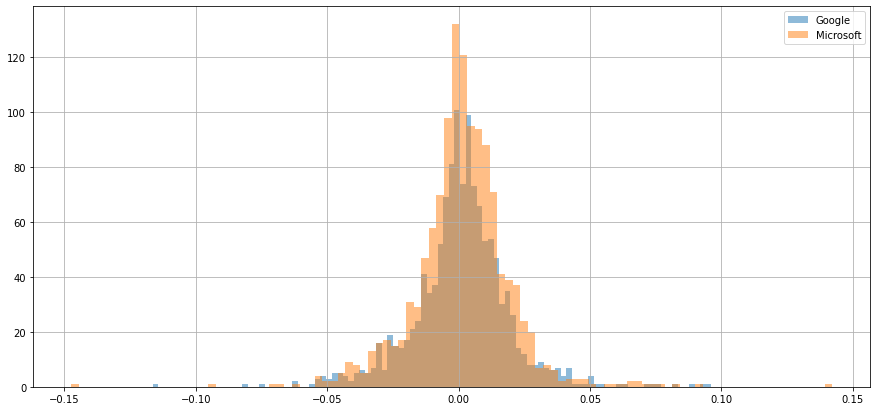

In [59]:
google['returns'].hist(bins=100,alpha=0.5,label='Google',figsize=(15,7))
microsoft['returns'].hist(bins=100,alpha=0.5,label='Microsoft')
plt.legend()

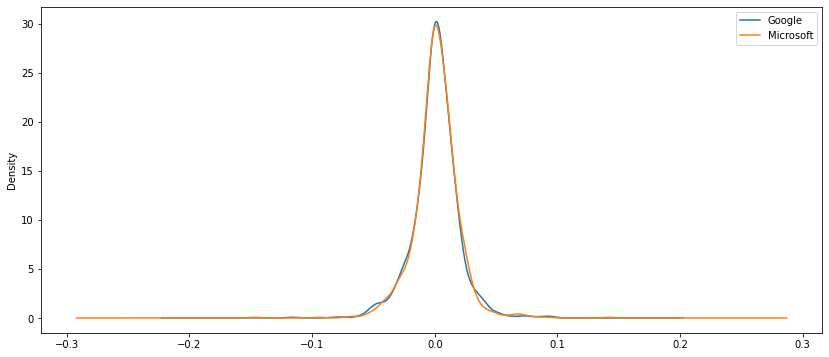

In [62]:
google['returns'].plot(kind='kde',label='Google',figsize=(14,6))
microsoft['returns'].plot(kind='kde',label='Microsoft')
plt.legend()

In [63]:
box_df=pd.concat([google['returns'],microsoft['returns']],axis=1)
box_df.columns=['Google Returns', 'Microsoft Returns']

array([[<AxesSubplot:xlabel='Google Returns', ylabel='Google Returns'>,
        <AxesSubplot:xlabel='Microsoft Returns', ylabel='Google Returns'>],
       [<AxesSubplot:xlabel='Google Returns', ylabel='Microsoft Returns'>,
        <AxesSubplot:xlabel='Microsoft Returns', ylabel='Microsoft Returns'>]],
      dtype=object)

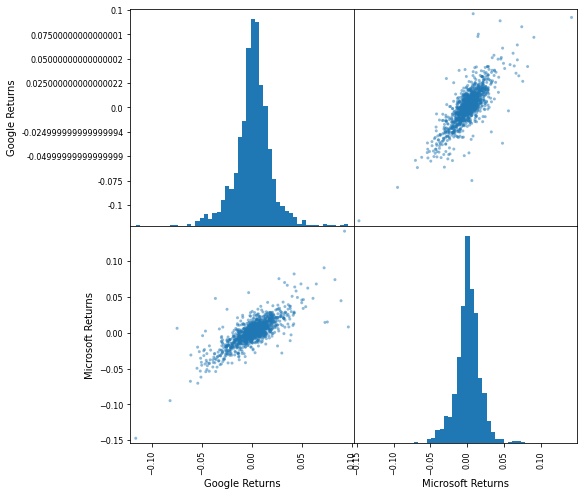

In [64]:
scatter_matrix(box_df,figsize=(8,8),hist_kwds={'bins':50})

In [65]:
google['Cumulative Returns']=(1+google['returns']).cumprod()

In [66]:
google.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA100,returns,Cumulative Returns
Date,,,,,,,,,,
2017-07-10,953.130005,941.950012,941.950012,951.000000,1451500,951.000000,1.367240e+09,NaN,NaN,NaN
2017-07-11,954.890015,945.119995,950.520020,953.530029,1461200,953.530029,1.388900e+09,NaN,0.002660,1.002660
2017-07-12,969.630005,957.039978,960.859985,967.659973,1602100,967.659973,1.539394e+09,NaN,0.014819,1.017518
2017-07-13,978.700012,964.799988,970.799988,968.849976,1524600,968.849976,1.480082e+09,NaN,0.001230,1.018770
2017-07-14,977.539978,970.150024,974.000000,976.909973,1079600,976.909973,1.051530e+09,NaN,0.008319,1.027245


In [67]:
microsoft['Cumulative Returns']=(1+microsoft['returns']).cumprod()

In [68]:
microsoft.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns,Cumulative Returns
Date,,,,,,,,,
2017-07-10,70.250000,69.199997,69.459999,69.980003,15014500.0,65.547043,1.042907e+09,NaN,NaN
2017-07-11,70.680000,69.750000,70.000000,69.989998,17460000.0,65.556396,1.222200e+09,0.000143,1.000143
2017-07-12,71.279999,70.550003,70.690002,71.150002,17750900.0,66.642937,1.254811e+09,0.016574,1.016719
2017-07-13,72.040001,71.309998,71.500000,71.769997,20269800.0,67.223640,1.449291e+09,0.008714,1.025579
2017-07-14,73.269997,71.959999,72.239998,72.779999,25868100.0,68.169662,1.868711e+09,0.014073,1.040011


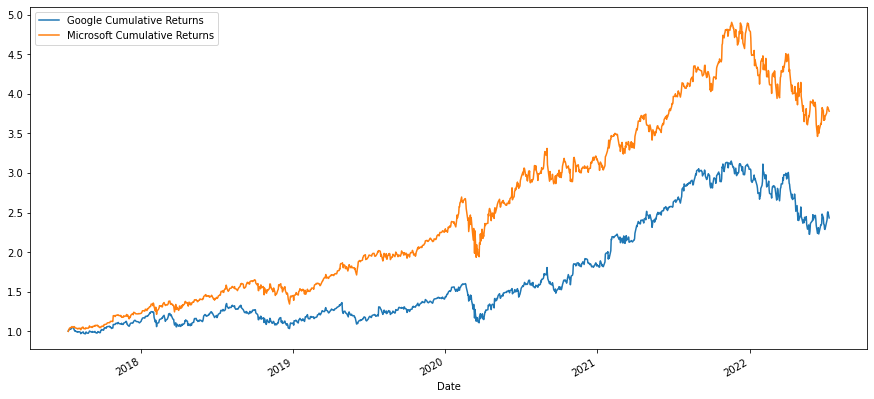

In [72]:
google['Cumulative Returns'].plot(label='Google Cumulative Returns',figsize=(15,7))
microsoft['Cumulative Returns'].plot(label='Microsoft Cumulative Returns')
plt.legend()